# Overview of PyTorch

References:
* https://www.udemy.com/course/pytorch-for-deep-learning-with-python-bootcamp
* www.pytorch.org

## Part #1 (Basics)

In [95]:
import torch
import numpy as np

## check version of pytorch

In [96]:
torch.__version__

'1.2.0'

## convert NumPy arrays to Tensors

In [97]:
a1 = np.linspace(0,1,16).reshape(4,4)
a1

array([[0.        , 0.06666667, 0.13333333, 0.2       ],
       [0.26666667, 0.33333333, 0.4       , 0.46666667],
       [0.53333333, 0.6       , 0.66666667, 0.73333333],
       [0.8       , 0.86666667, 0.93333333, 1.        ]])

In [98]:
b1 = torch.tensor(a1, dtype=torch.float16)
print('b1:', b1)
print('type:',type(b1))
print('size:',b1.size())
print('device:',b1.device)

b1: tensor([[0.0000, 0.0667, 0.1333, 0.2000],
        [0.2666, 0.3333, 0.3999, 0.4666],
        [0.5332, 0.6001, 0.6665, 0.7334],
        [0.7998, 0.8667, 0.9331, 1.0000]], dtype=torch.float16)
type: <class 'torch.Tensor'>
size: torch.Size([4, 4])
device: cpu


## check if GPU is availalbe and print GPU in use

In [99]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print('Running on device:', device)
if use_cuda:
    print('Using GPU:',
          torch.cuda.get_device_name(torch.cuda.current_device()))

Running on device: cuda:0
Using GPU: GeForce GTX 960M


## move Tensor to GPU from CPU

In [100]:
b1 = b1.to(device)
print('b1:', b1)
print('type:',type(b1))
print('size:',b1.size())
print('device:',b1.device)

b1: tensor([[0.0000, 0.0667, 0.1333, 0.2000],
        [0.2666, 0.3333, 0.3999, 0.4666],
        [0.5332, 0.6001, 0.6665, 0.7334],
        [0.7998, 0.8667, 0.9331, 1.0000]], device='cuda:0',
       dtype=torch.float16)
type: <class 'torch.Tensor'>
size: torch.Size([4, 4])
device: cuda:0


In [101]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print('a\n', a)
print('b\n',b)
print('a + b\n', a + b)
print('a - b\n', a - b)
print('a * b\n', a.mul(b))
print('a / b\n', a / b)
print('a . b\n',a.dot(b))

a
 tensor([1., 2., 3.])
b
 tensor([4., 5., 6.])
a + b
 tensor([5., 7., 9.])
a - b
 tensor([-3., -3., -3.])
a * b
 tensor([ 4., 10., 18.])
a / b
 tensor([0.2500, 0.4000, 0.5000])
a . b
 tensor(32.)


In [102]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a)
print('b: ',b)
print('a x b: ',torch.mm(a,b))

a:  tensor([[0., 2., 4.],
        [1., 3., 5.]])
b:  tensor([[ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])
a x b:  tensor([[56., 62.],
        [80., 89.]])


In [103]:
x = torch.tensor([3.,7.])
print('L2 norm',x.norm())
print('num of ele.', x.numel())

L2 norm tensor(7.6158)
num of ele. 2


## Part #2 (PyTorch Gradients)

$\begin{split}Function:\quad y &= 2x^4 + x^3 + 3x^2 + 5x + 1 \\
Derivative:\quad y' &= 8x^3 + 3x^2 + 6x + 5\end{split}$

In [104]:
x = torch.tensor(2.0, requires_grad=True)
print(x.grad)

None


In [105]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


$\quad y=2(2)^4+(2)^3+3(2)^2+5(2)+1 = 32+8+12+10+1 = 63$

This is the value of $y$ when $x=2$.

In [106]:
# gradient function of y
y.grad_fn

In [107]:
y.backward()

In [108]:
print(x.grad)

tensor(93.)


$\quad y'=8(2)^3+3(2)^2+6(2)+5 = 64+12+12+5 = 93$

In [109]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


 $y = 3x+2$

In [110]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


 $z = 2y^2$

In [111]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [112]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [113]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


x --> y --> z --> o

$o = \frac {1} {6}\sum_{i=1}^{6} z_i$<br>

$z_i = 2(y_i)^2 = 2(3x_i+2)^2$<br>

To solve the derivative of $z_i$ we use the <a href='https://en.wikipedia.org/wiki/Chain_rule'>chain rule</a>, where the derivative of $f(g(x)) = f'(g(x))g'(x)$<br>

In this case<br>

$\begin{split} f(g(x)) &= 2(g(x))^2, \quad &f'(g(x)) = 4g(x) \\
g(x) &= 3x+2, &g'(x) = 3 \\
\frac {dz} {dx} &= 4g(x)\times 3 &= 12(3x+2) \end{split}$

Therefore,<br>

$\frac{\partial o}{\partial x_i} = \frac{1}{6}\times 12(3x+2)$<br>

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = 2(3(1)+2) = 10$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=2} = 2(3(2)+2) = 16$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=3} = 2(3(3)+2) = 22$

## Part #3 (Linear Regression)

In [114]:
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
X = torch.linspace(1,50,50).reshape(-1,1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


### generate random noise (error)

In [116]:
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e)

tensor([[-3.],
        [-8.],
        [ 4.],
        [-2.],
        [-8.],
        [ 5.],
        [ 7.],
        [ 7.],
        [-1.],
        [ 8.],
        [-3.],
        [-2.],
        [-3.],
        [ 4.],
        [ 1.],
        [ 4.],
        [ 6.],
        [ 7.],
        [ 3.],
        [ 4.],
        [ 0.],
        [-4.],
        [-5.],
        [ 2.],
        [-7.],
        [ 2.],
        [ 0.],
        [-7.],
        [ 1.],
        [-8.],
        [-3.],
        [ 3.],
        [-4.],
        [-8.],
        [-8.],
        [-8.],
        [ 8.],
        [-8.],
        [-1.],
        [ 6.],
        [-3.],
        [ 1.],
        [-4.],
        [-1.],
        [ 6.],
        [-7.],
        [ 7.],
        [-5.],
        [ 5.],
        [ 1.]])


In [117]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


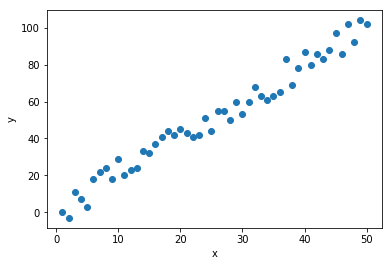

In [118]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [119]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [120]:
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: -0.39688265323638916
Bias:   0.5515450239181519


In [121]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [122]:
epochs = 100
losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(
        f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 4929.79492188  weight: -0.39688265  bias: 0.55154502
epoch:  2  loss: 2557.79125977  weight: 3.70659614  bias: 0.67392296
epoch:  3  loss: 1333.21032715  weight: 0.75816071  bias: 0.58677870
epoch:  4  loss: 701.00311279  weight: 2.87663293  bias: 0.65017897
epoch:  5  loss: 374.61715698  weight: 1.35445511  bias: 0.60541034
epoch:  6  loss: 206.11563110  weight: 2.44813967  bias: 0.63836229
epoch:  7  loss: 119.12431335  weight: 1.66228747  bias: 0.61547047
epoch:  8  loss: 74.21373749  weight: 2.22691083  bias: 0.63270289
epoch:  9  loss: 51.02795792  weight: 1.82119691  bias: 0.62110502
epoch: 10  loss: 39.05779266  weight: 2.11268544  bias: 0.63022178
epoch: 11  loss: 32.87796021  weight: 1.90322328  bias: 0.62445438
epoch: 12  loss: 29.68742752  weight: 2.05370188  bias: 0.62938106
epoch: 13  loss: 28.04016304  weight: 1.94555736  bias: 0.62662351
epoch: 14  loss: 27.18963814  weight: 2.02323747  bias: 0.62938684
epoch: 15  loss: 26.75045013  weight: 1.96739995  b

Text(0.5, 0, 'epoch')

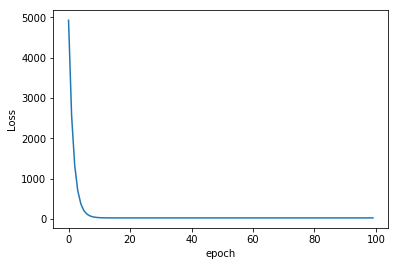

In [123]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [124]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')

x1 = np.array([X.min(),X.max()])
y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98960233, Current bias: 0.66716892
[ 1. 50.]
[  2.6567712 100.147285 ]


Text(0.5, 0, 'x')

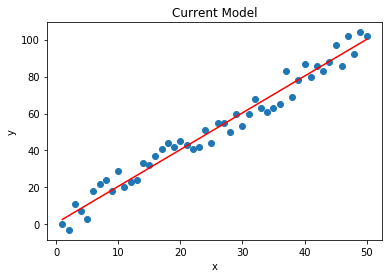

In [125]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')

## Part #4 (Linear Regression)

See http://www.cs.sjsu.edu/faculty/pollett/masters/Semesters/Spring20/pratik/index.php?Deliverable1.php for CNN examples
